# 6.6: Sourcing & Analyzing Time Series Data - Task

#### This analysis will delve into Univariate time series data of New Privately Owned Housing Units Started in the US from 1959 to 2021.  The dataset has been sourced by the research department of the Federal Reserve Bank of St. Louis.  By way of Time series analysis, we can gain valuable insights into the historical trends and future potential of housing starts in the US. 

##### Link to data source: https://data.nasdaq.com/data/FRED-federal-reserve-economic-data/documentation.

### This script contains the following:

#### 1. Install Quandl, import libraries and data
#### 2. Wrangling and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the data

## Step 1

### 1. Install Quandl, import libraries and data

##### Install Quandl using conda:  type the following command in the terminal window ->  conda install -c anaconda quandl
##### registered for Quandl account

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

## Step 2

In [2]:
# configure API key

quandl.ApiConfig.api_key = 'EcrKof187PKE3zkVPGg6'

In [3]:
# Federal Reserve Economic Data - Housing Starts: Total: New Privately Owned Housing Units Started

data = quandl.get('FRED/HOUST')

In [4]:
data.tail()

,Value
Date,
2021-08-01,1573.0
2021-09-01,1550.0
2021-10-01,1552.0
2021-11-01,1678.0
2021-12-01,1702.0


In [5]:
data.shape

(756, 1)

In [6]:
data.columns

Index(['Value'], dtype='object')

In [7]:
type(data)

pandas.core.frame.DataFrame

## Step 3

###  No subsetting is being done here because it helps the analysis of long term housing trend 

## Step 4

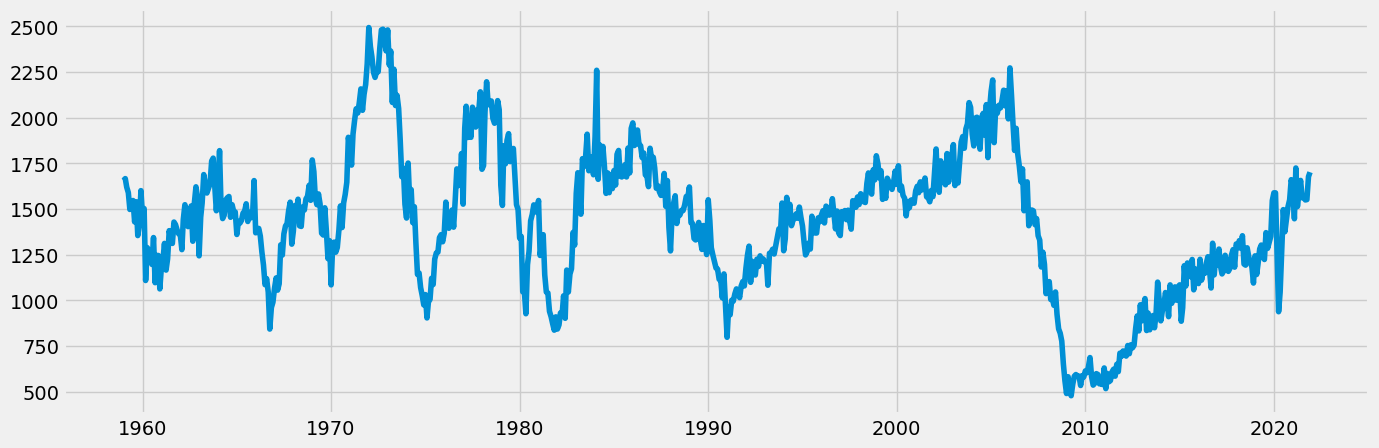

In [8]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data)

### 2. Wrangling, and cleaning time-series 

In [9]:
data2=data.reset_index()

In [10]:
data2.shape

(756, 2)

In [11]:
data2.columns

Index(['Date', 'Value'], dtype='object')

In [12]:
# Set the "Date" column as the index

from datetime import datetime

data2['datetime'] = pd.to_datetime(data2['Date']) # Create a datetime column from "Date.""
data2 = data2.set_index('datetime') # Set the datetime as the index of the dataframe.
data2.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data2.head()

,Value
datetime,
1959-01-01,1657.0
1959-02-01,1667.0
1959-03-01,1620.0
1959-04-01,1590.0
1959-05-01,1498.0


In [13]:
data2.columns

Index(['Value'], dtype='object')

In [14]:
# Check for missing values (you shouldn't have any)

data2.isnull().sum()

Value    0
dtype: int64

In [15]:
# Check for duplicates

dups=data2.duplicated()

dups.sum()


# It's okay to have duplicates.  There can be same number of New Privately Owned Housing Units Started in different dates.

179

## Step 5

### 3. Time-series analysis: decomposition

In [16]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data2, model='additive')

In [17]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

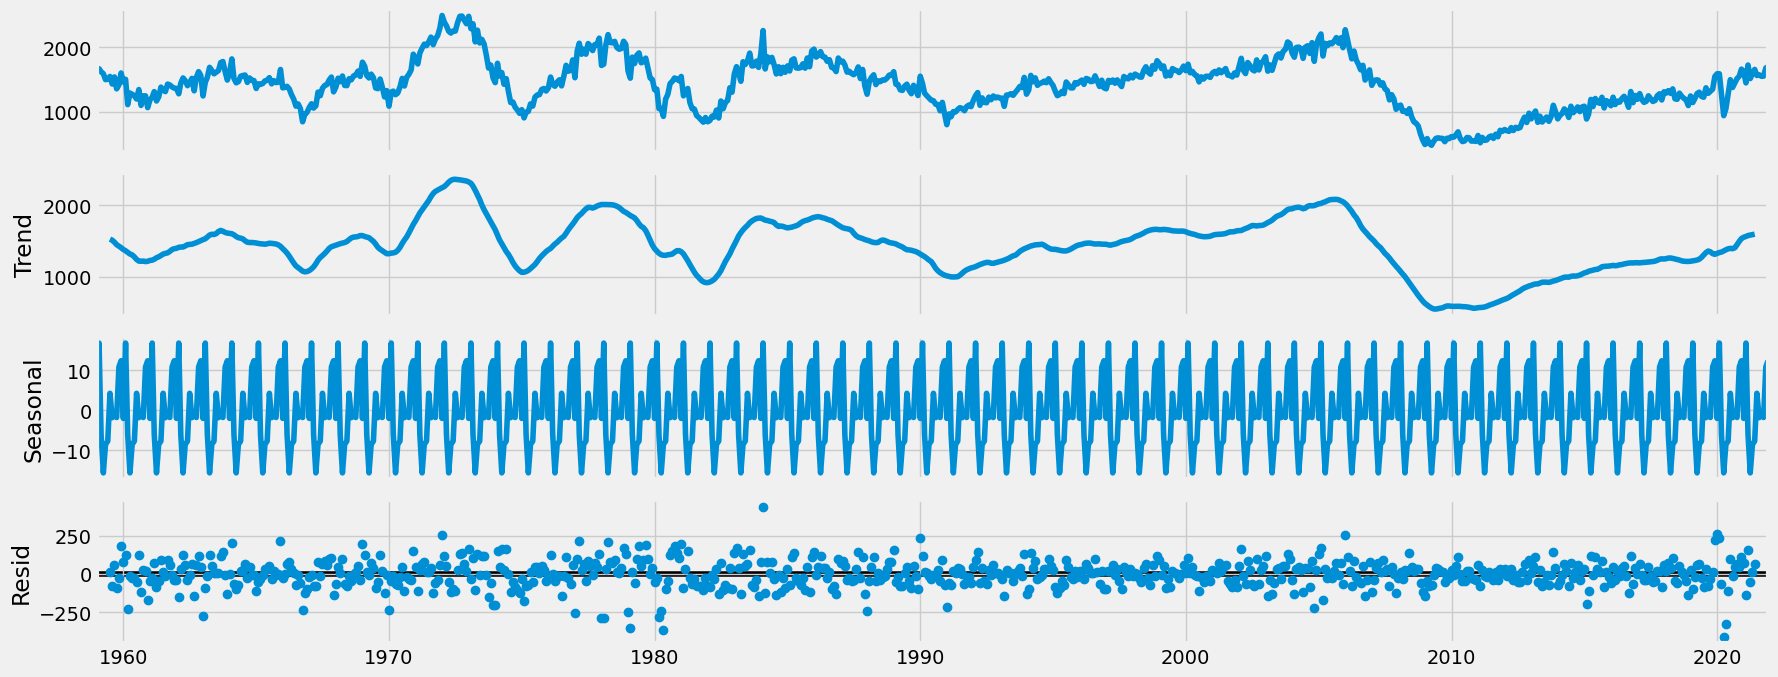

In [18]:
# Plot the separate components

decomposition.plot()
plt.show()

#### The Trend line with fluctuations shows the total number of new houses built each year (housing starts) across the 50 years. This indicates that the housing market has not steadily grown or declined but rather experienced ups and downs.  The all-time low around 2009 suggests a significant decline in housing starts during that period. This could be linked to the 2008 financial crisis, which heavily impacted the housing market.  The fact that the market seems to pick up at a gradual pace since 2009 implies a slow and steady increase in housing construction over the following years.
#### Consistent dips and rise in housing stats over the years clearly indicate that Seasonality pattern exists.  This is a very likely pattern in a housing data, since factors such as weather, school schedules, holidays etc affects the market.
#### The Residual plot shows some noise as the plots are not tightly centered around zero. It could be that some housing projects may not follow the underlying trend, at the same time doesn't have a major impact on the trend.

## Step 6

### 4. Testing for stationarity

In [19]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data2['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                  -3.861502
p-value                          0.002337
Number of Lags Used             16.000000
Number of Observations Used    739.000000
Critical Value (1%)             -3.439230
Critical Value (5%)             -2.865459
Critical Value (10%)            -2.568857
dtype: float64


#### The test statistic is larger than the critical values, so we must stationarize the data.

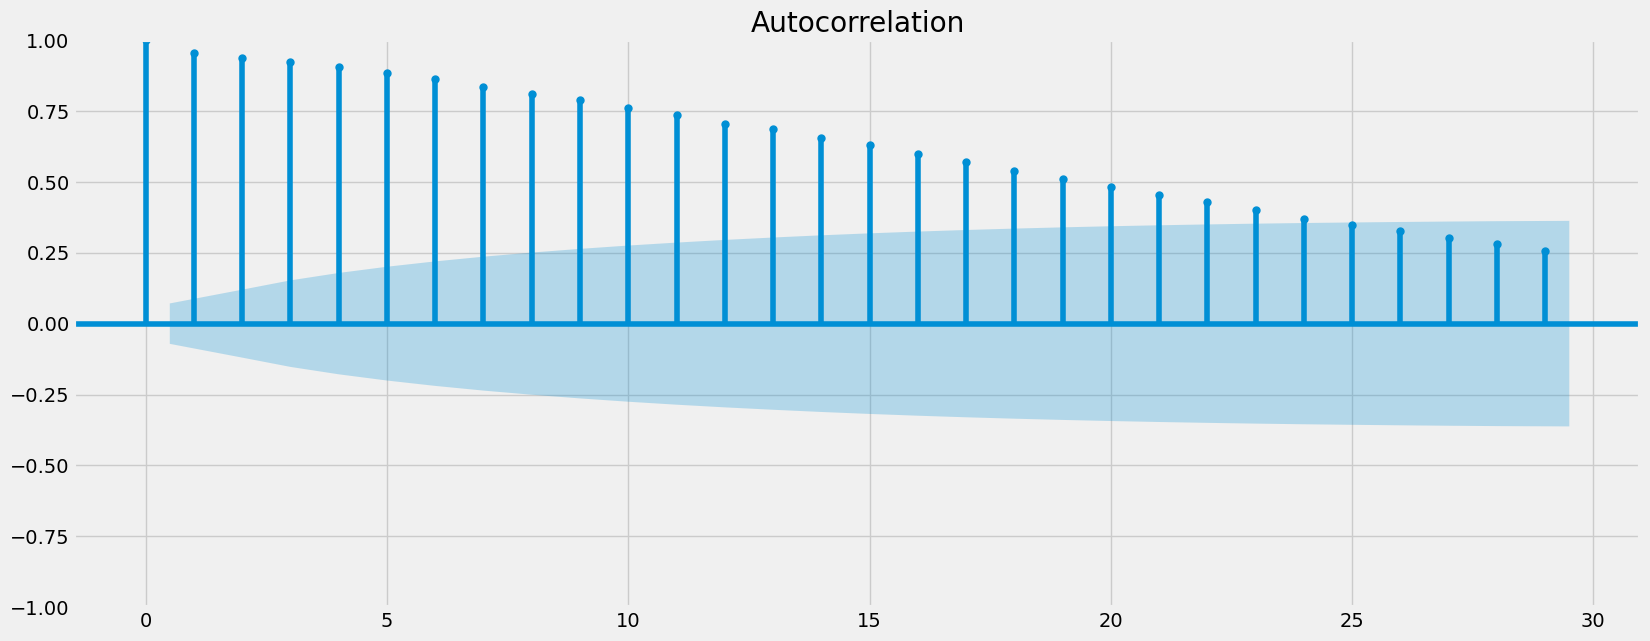

In [20]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data2)
plt.show()

#### There are many lags above the confidence interval edge, which means there are many lags significantly correlated with each other (or there is a lot of autocorrelated data, supporting the result of the Dickey-Fuller test)

## Step 7

### 5. Stationarizing the Data

In [21]:
data_diff = data2 - data2.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [22]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [23]:
data_diff.head()

,Value
datetime,
1959-02-01,10.0
1959-03-01,-47.0
1959-04-01,-30.0
1959-05-01,-92.0
1959-06-01,5.0


In [24]:
data_diff.columns

Index(['Value'], dtype='object')

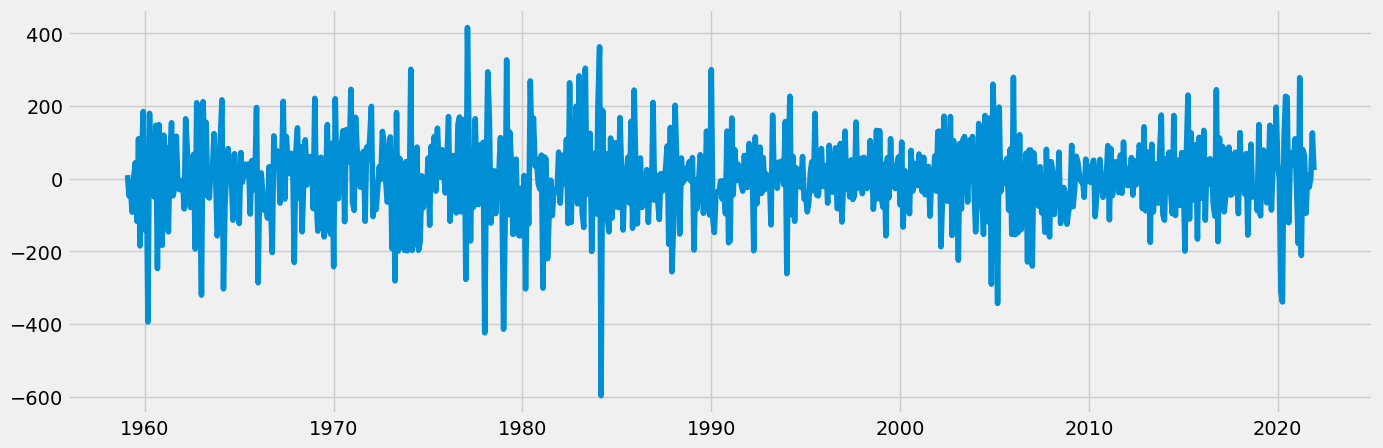

In [25]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [26]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -7.025313e+00
p-value                        6.387001e-10
Number of Lags Used            1.200000e+01
Number of Observations Used    7.420000e+02
Critical Value (1%)           -3.439194e+00
Critical Value (5%)           -2.865443e+00
Critical Value (10%)          -2.568848e+00
dtype: float64


#### Test Statistic is now smaller than all Critical values.  Another round of differencing not required.

## Step 9

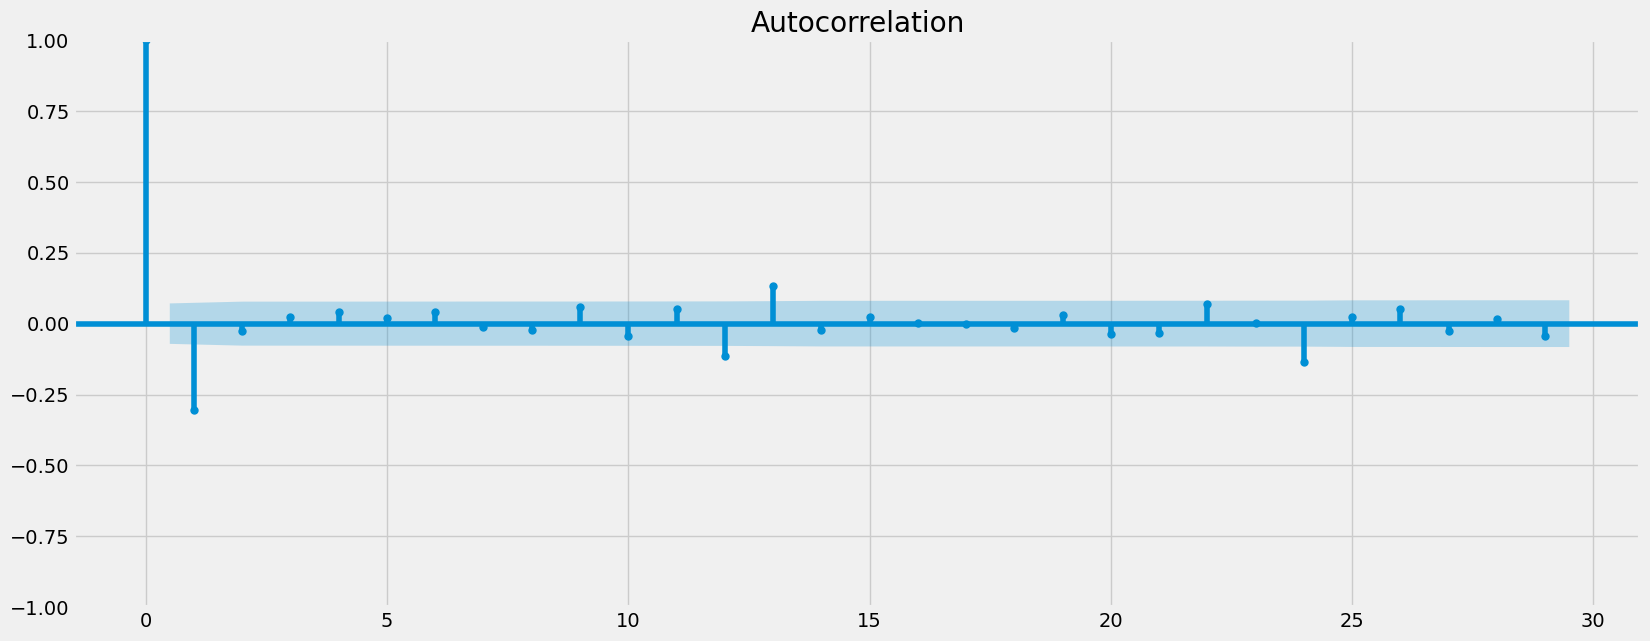

In [27]:
plot_acf(data_diff)
plt.show()

#### The number of lags above the blue confidence level is less than 10, thus stopping here. 